##                            CODE ALPHA   WEEK - 2   DATA PREPROCESSING 

1. DATA INTEGRITY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("D:/faryal/CodeAlpha datascience internship/week 2/Advertising.csv")


In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
# list the data types for each column
print(df.dtypes)

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object


In [6]:
print("Size of the dataset: ", df.size)
print("Columns in the dataset: ", df.keys())

Size of the dataset:  1000
Columns in the dataset:  Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [7]:
print("Number of rows",df.shape[0])
print("Number of columns",df.shape[1])

Number of rows 200
Number of columns 5


In [8]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
# Insight about unique values
df.nunique()

Unnamed: 0    200
TV            190
Radio         167
Newspaper     172
Sales         121
dtype: int64

2. MISSING DATA HANDLING

In [10]:
print("Is there any null or missing values ? ",df.isnull().sum().any())
print("percentage of null values in particular column",df.isnull().sum()/len(df)*1000)

Is there any null or missing values ?  False
percentage of null values in particular column Unnamed: 0    0.0
TV            0.0
Radio         0.0
Newspaper     0.0
Sales         0.0
dtype: float64


A. Drop all unnecessary columns

In [11]:
# drop unwanted columns

df.drop('Unnamed: 0',axis=1, inplace=True)
print("unnamed column is droped now")

df.isna().sum()

unnamed column is droped now


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

3.DUPLICATE REMOVAL

In [12]:
print("Information of the dataset: \n",df.info())
print("After removing duplicates: \n",df.drop_duplicates(inplace=True)) #cleaning the data by checking the duplicates
print("Size of the dataset after removing duplicates: \n",df.size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
Information of the dataset: 
 None
After removing duplicates: 
 None
Size of the dataset after removing duplicates: 
 800


 OUTLIER DETECTION

IDENTIFYING OUTLIERS USING Z-SCORE

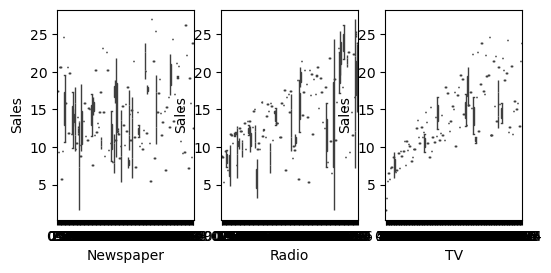

In [20]:
#ploting box plot to find outliers
plt.figure(figsize=(6, 6))
plt.subplot(2,3,1)
sns.boxplot(x = 'Newspaper', y = 'Sales', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'Radio', y = 'Sales', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'TV', y = 'Sales', data = df)

plt.show()

In [13]:
import pandas as pd
import numpy as np

# Example function to detect outliers based on Z-score
def detect_outliers_zscore(df, column_name, threshold=3):
    if df is not None and column_name in df.columns:
        # Calculate Z-scores
        df['Z-Score'] = (df[column_name] - df[column_name].mean()) / df[column_name].std()
        
        # Identify outliers
        outliers = df[df['Z-Score'].abs() > threshold]
        return outliers
    else:
        print("DataFrame is None or column does not exist.")
        return None


# Call the function with the DataFrame and column name
outliers = detect_outliers_zscore(df, 'Sales')

# Check if outliers were found
if outliers is not None:
    print("Outliers FOUND \n:", outliers)
else:
    print("No outliers found or DataFrame issue.")

Outliers FOUND 
: Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales, Z-Score]
Index: []


ADRESSING OUTLIERS

In [14]:
import pandas as pd
import numpy as np

if df is not None and 'Sales' in df.columns:
    # Calculate Z-scores
    df['Z-Score'] = (df['Sales'] - df['Sales'].mean()) / df['Sales'].std()
    
    # Check if Z-Score column was created
    if 'Z-Score' in df.columns:
        # Remove outliers
        df_no_outliers = df[df['Z-Score'].abs() <= 3]
        print("NO OUTLIER LEFT \n",df_no_outliers.head())  # Display the first few rows without outliers
    else:
        print("'Z-Score' column is missing. Please calculate it first.")
else:
    print("DataFrame is None or 'Sales' column is missing.")

NO OUTLIER LEFT 
       TV  Radio  Newspaper  Sales   Z-Score
0  230.1   37.8       69.2   22.1  1.548168
1   44.5   39.3       45.1   10.4 -0.694304
2   17.2   45.9       69.3    9.3 -0.905135
3  151.5   41.3       58.5   18.5  0.858177
4  180.8   10.8       58.4   12.9 -0.215143


NO OUTLIERS LEFT IN THE DATA SET

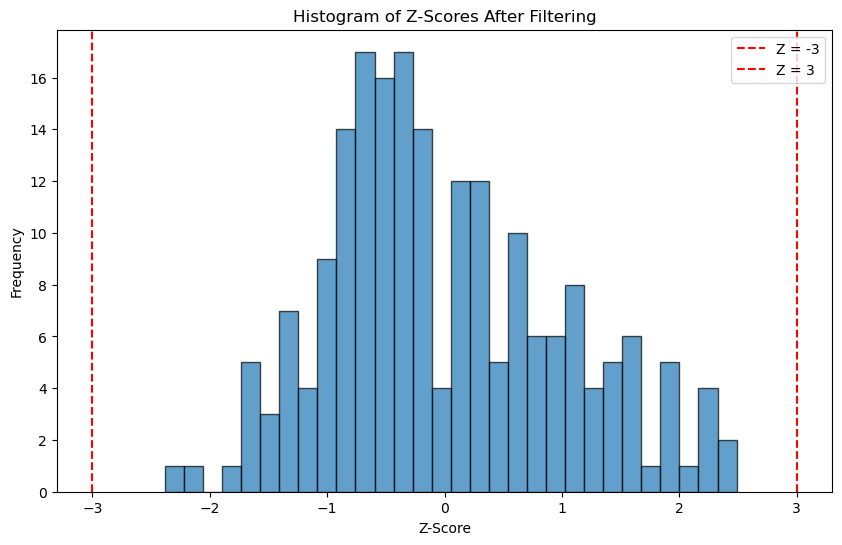

In [15]:
import matplotlib.pyplot as plt

# Plot histogram of Z-scores after filtering
plt.figure(figsize=(10, 6))
plt.hist(df_no_outliers['Z-Score'], bins=30, edgecolor='k', alpha=0.7)
plt.axvline(x=-3, color='r', linestyle='--', label='Z = -3')
plt.axvline(x=3, color='r', linestyle='--', label='Z = 3')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.title('Histogram of Z-Scores After Filtering')
plt.legend()
plt.show()

FEATURE SCALING for tv and sales

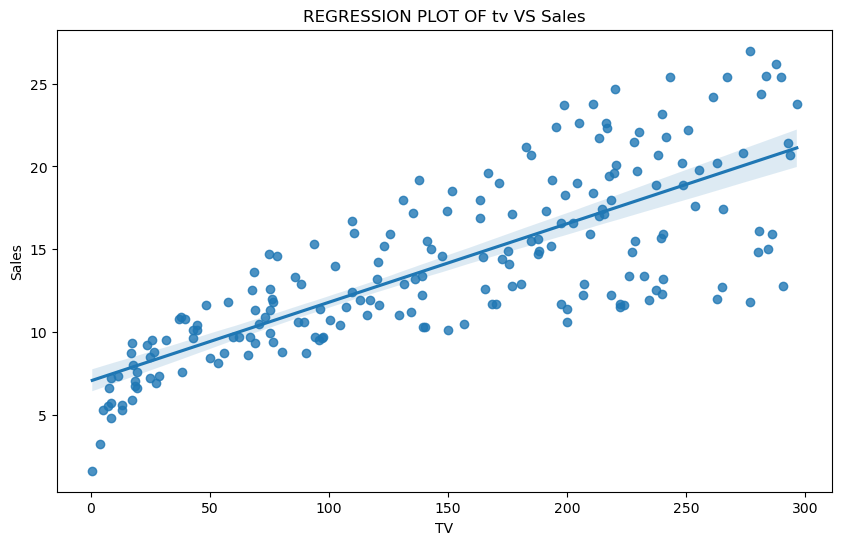

In [23]:
#regression  plot

plt.figure(figsize = ( 10 , 6 ))
sns.regplot( x = "TV" , y = "Sales" , data = df_no_outliers)
plt.title("REGRESSION PLOT OF tv VS Sales")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

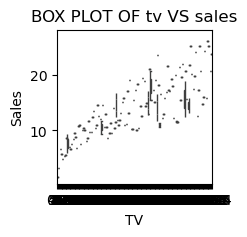

In [24]:
#boxplot 

plt.figure(figsize = ( 2 , 2 ))
sns.boxplot( x = "TV" , y = "Sales" , data = df_no_outliers)
plt.title("BOX PLOT OF tv VS sales")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

In [25]:
df_no_outliers.corr()['Sales'].sort_values()

Newspaper    0.228299
Radio        0.576223
TV           0.782224
Sales        1.000000
Z-Score      1.000000
Name: Sales, dtype: float64

TRAIN-SPLIT DATASET

In [37]:
from sklearn.model_selection import train_test_split


df_train_x = df[['TV']]

# Target variable column
df_train_y = df['Sales']

# Train Test Splitting
x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.20, random_state=42)

In [38]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [39]:
X_train = x_train.values if isinstance(x_train, pd.Series) else x_train
y_train = y_train.values if isinstance(y_train, pd.Series) else y_train
X_test = x_test.values if isinstance(x_test, pd.Series) else x_test
y_test = y_test.values if isinstance(y_test, pd.Series) else y_test

In [40]:
# Convert DataFrames to Series (assuming single feature for simplicity)
X_train_series = X_train.squeeze()  # Converts to Series if single column
X_test_series = X_test.squeeze()

In [41]:
# Combine the data into a single DataFrame
combined_df = pd.DataFrame({
    'X_train': X_train_series.reset_index(drop=True),
    'y_train': pd.Series(y_train).reset_index(drop=True),
    'X_test': X_test_series.reset_index(drop=True),
    'y_test': pd.Series(y_test).reset_index(drop=True)
})

In [42]:
# Save to CSV
combined_df.to_csv('D:/faryal/CodeAlpha datascience internship/week 2/combined_train_test_data.csv', index=False)



In [43]:
# Optional: Read and print the combined data
combined_read = pd.read_csv('D:/faryal/CodeAlpha datascience internship/week 2/combined_train_test_data.csv')
print(combined_read)

     X_train  y_train  X_test  y_test
0      116.0     11.0   163.3    16.9
1      177.0     12.8   195.4    22.4
2       43.1     10.1   292.9    21.4
3       62.3      9.7    11.7     7.3
4      224.0     11.6   220.3    24.7
..       ...      ...     ...     ...
155     25.0      7.2     NaN     NaN
156    204.1     19.0     NaN     NaN
157    217.7     19.4     NaN     NaN
158    165.6     12.6     NaN     NaN
159    280.2     14.8     NaN     NaN

[160 rows x 4 columns]


FARYAL SHAKEEL
CODEALPHA WEEK - 2
TASK1-DATAPREPROCESSING
BS-COMPUTER SCIENCE
4 SEPT 2024